# Exercise 1-1: Linear Regression

In this exercise, we will implement linear regression with one variable to predict profits for a food truck.

# Part 1: Basic Function

To warm up, the warm_up_exercise() returns a 5x5 identity matrix.

In [4]:
import numpy as np


def warm_up_exercise():
    """
    An example function that returns the 5x5 identity matrix.

    Returns
    -------
    A : ndarray, shape (5, 5)
        A 5x5 identity matrix.
    """
    A = np.eye(5, dtype=int)
    return A

Run warm_up_exercise():

In [5]:
print '5x5 Identity Matrix: '
print warm_up_exercise()

5x5 Identity Matrix: 
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


# Part 2: Plotting

The data ex1data1.txt has only two properties: profit and population.

In [7]:
data = np.loadtxt(open("ex1data1.txt", "r"), delimiter=",")
X = data[:, 0]
y = data[:, 1]
m = len(y)  # Number of training examples

The plot_data() uses scatter plot to visualize the data.

In [8]:
import matplotlib.pyplot as plt


def plot_data(x, y):
    """
    Plots the data points x and y.

    Parameters
    ----------
    x : array-like
        Data on x axis.
    y : array-like
        Data on y axis.
    """
    plt.plot(x, y, linestyle='', marker='x', color='r', label='Training data')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')

Plot and show the figure:

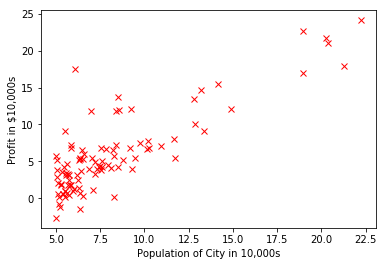

In [9]:
plt.figure()
plot_data(X, y)
plt.show()

# Part 3: Gradient descent

In this part, we will fit the linear regression parameters to our dataset using gradient descent. Parameters are initialized as follows:
* Add a column of ones to x to accommodate the theta_0 intercept term:

In [10]:
X = np.hstack((np.ones((m, 1)), X.reshape(m, 1)))

* Initialize fitting parameters with zeros:

In [11]:
theta = np.zeros(2)

* Some gradient descent settings:

In [12]:
iterations = 1500
alpha = 0.01

The compute_cost function below computes cost for linear regression.

In [13]:
def compute_cost(x, y, theta):
    """
    Compute cost for linear regression.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    theta : ndarray, shape (n_features,)
        Linear regression parameter.

    Returns
    -------
    J : numpy.float64
        The cost of using theta as the parameter for linear regression to fit the data points in X and y.
    """
    m = len(y)
    J = np.sum(np.square(x.dot(theta) - y)) / (2.0 * m)

    return J

Compute and print the cost:

In [14]:
cost = compute_cost(X, y, theta)
print 'The cost on initial theta:', cost

The cost on initial theta: 32.072733877455676


The gradient_descent() performs gradient descent to learn theta.

In [15]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    theta : ndarray, shape (n_features,)
        Initial linear regression parameter.
    alpha : float
        Learning rate.
    num_iters: int
        Number of iteration.

    Returns
    -------
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    J_history: ndarray, shape (num_iters,)
        Cost history.
    """
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        theta -= alpha / m * ((X.dot(theta) - y).T.dot(X))
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

Run gradient descent and print the theta found by gradient descent:

In [16]:
theta, _ = gradient_descent(X, y, theta, alpha, iterations)
print "Theta found by gradient descent: \n", theta

Theta found by gradient descent: 
[-3.63029144  1.16636235]


Plot the linear fit:

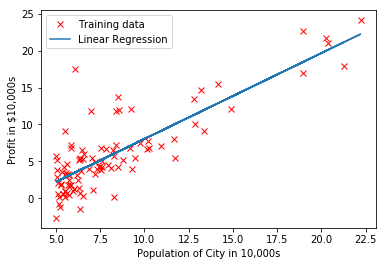

In [17]:
plt.figure()
plot_data(X[:, 1], y)
plt.plot(X[:, 1], X.dot(theta), label='Linear Regression')
plt.legend(loc='upper left', numpoints=1)
plt.show()

Predict values for population sizes of 35,000 and 70,000:

In [18]:
predict1 = np.array([1, 3.5]).dot(theta)
print "For population = 35,000, we predict a profit of", predict1 * 10000

predict2 = np.array([1, 7]).dot(theta)
print "For population = 70,000, we predict a profit of", predict2 * 10000

For population = 35,000, we predict a profit of 4519.7678677017675
For population = 70,000, we predict a profit of 45342.45012944714


# Part 4: Visualizing J(theta_0, theta_1)

In this part we will plot the cost over a 2-dimensional grid of theta_0 and theta_1 values.

Grid over theta0_vals / theta1_vals and fill out j_vals:

In [20]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out j_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = compute_cost(X, y, t)

# We need to transpose J_vals before calling plot_surface, or else the axes will be flipped.
J_vals = J_vals.T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

Surface plot:

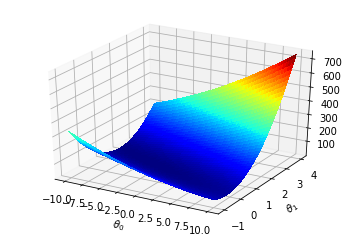

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=2, cstride=2, cmap=cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
plt.show()

Contour plot:

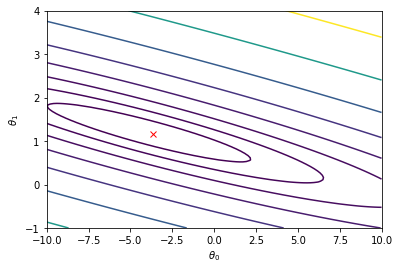

In [22]:
plt.figure()
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], linestyle='', marker='x', color='r')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()